<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/files')

In [2]:
!pwd

/content/drive/MyDrive/Colab Notebooks/files


# Project Practice - Kaggle's Titanic competition
Detailed Time Schedule

*   Import files and check files - 2022.04.04 
*   Check nulls and deal with them - 2022.04.04
*   Data Preprocessing
    - Set up the logic
    - Visulaization
    - Check Outliners and deal with it  - 2022.04.04








In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import and read files

train = pd.read_csv('ttn_train.csv')
test = pd.read_csv('tn_test.csv')
display(train.head(), test.head())

In [5]:
# shape of each data

print('train data:', train.shape, 'test data:', test.shape)

train data: (891, 12) test data: (418, 11)


In [ ]:
# info of each data
print('train data:', train.info(), 'test data:', test.info())
print()
train.isnull().sum()
print()
test.isnull().sum()

#Findings from above


1.   There are null vales in Age & Cabin categories.
2.   Dtypes of 5 categories are object which needs to be converted to either int or float



In [ ]:
# Let's see how each data looks like
train.head()

In [ ]:
test.head()

# EDA through visualization

In [9]:
# make a copy of origianal data
df_train = train.copy()
df_test = test.copy()


In [10]:
# drop names cause I don't think it is helpful for ML. 

df_train.drop(columns=['Name'], inplace=True)
df_test.drop(columns=['Name'], inplace=True)

In [11]:
# Set PassengerId as index
df_train.set_index('PassengerId', inplace=True)


In [12]:
df_test.set_index('PassengerId', inplace=True)

In [ ]:
# Draw Pariplot

sns.pairplot(df_train)

## Insights from Pariplot 
역시 봐도 뭔소리인지 모르겠군


In [ ]:
df_train.head()

In [63]:
# Sex와 Survival(0 = die / 1=survived) 
t = pd.crosstab(df_train['Sex'], df_train['Survived'], normalize='index').round(4)*100
t



Survived,0,1
Sex,,
0,25.80,74.20
1,81.11,18.89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived by Sex')

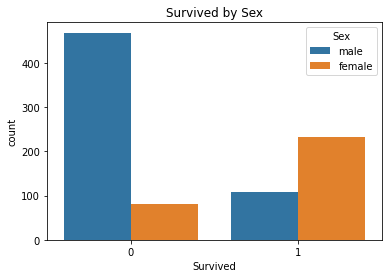

In [15]:
# Visualization
sns.countplot('Survived', data=df_train, hue='Sex')
plt.title('Survived by Sex')


In [65]:
t_pclass_survived = pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True, normalize='index')
t_pclass_survived


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


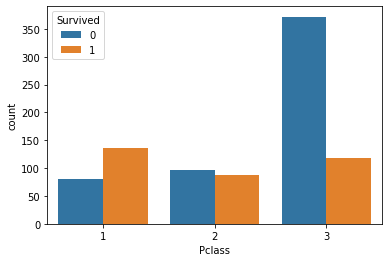

In [17]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.show()


In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)
# 확실히 1등석일수록 생존확률이 좀 더 높다. 가치 있는 feature이군..

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [70]:
# Age와 Survived

t_age_survived = pd.crosstab(df_train['Survived'], df_train['Age'],normalize='index').round(4)*100
t_age_survived

Age,0,1,2,3,4,5,6
Survived,,,,,,,
0,5.28,7.29,14.75,26.96,15.3,10.56,19.85
1,11.40,9.06,15.50,15.20,15.5,15.79,17.54


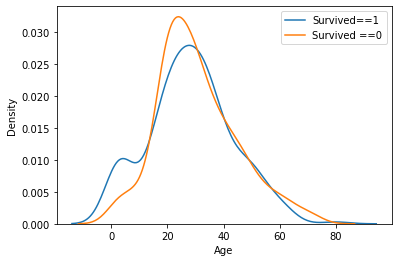

In [20]:
#kdeplo이 표현하기 좋다.
sns.kdeplot(df_train[df_train['Survived']==1]['Age'])
sns.kdeplot(df_train[df_train['Survived']==0]['Age'])
plt.legend(['Survived==1', 'Survived ==0'])
plt.show()

# 나이가 젊은 사람들이 생존을 더 많이 한 경향이 있다. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


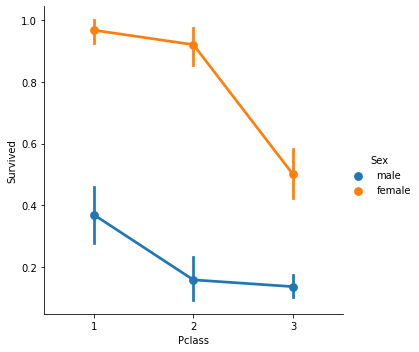

In [22]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train)

In [23]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 아래 뭔가 이상하다. 여기서부터 하자 20220410

In [77]:
t_sibsp_survived = df_train[['SibSp','Sex', 'Survived']].groupby(['Survived','Sex']).count()
t_sibsp_survived

# pd.crosstab(df_train['Parch'],df_train['Survived'])

# pd.pivot_table(df_train, index=['Survived','SibSp','Sex'])

# 형제자매 있는 여자들이 더 많이 생존했구나. 그리고 결혼한 사람들이 있으면 여자들이 생존했음. 남자가 희생

SibSp
Survived Sex       
0        0       81
         1      468
1        0      233
         1      109

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


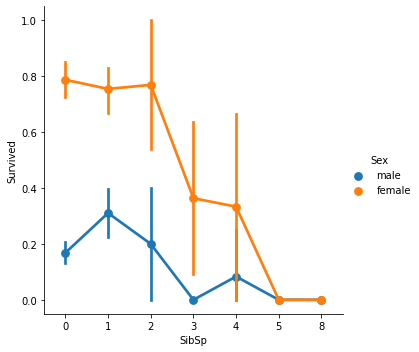

In [25]:
sns.factorplot(x='SibSp', y='Survived', hue='Sex', data=df_train)

In [26]:
# Parch and Survived

t_parch_survived = df_train[['Parch','Sex', 'Survived']].groupby(['Survived','Sex']).count()
t_parch_survived

Parch
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

이제까지 정리
: 여성의 생존률이 더 높다. -> 인코딩 필요
: Class 별로 생존률이 다르다. 1등석이 가장 높다 -> 활용 ㅇㅋ
: 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩)
: Parch는 
해야할 것:
: sib / children 분석
: 아마 female with mean of children whose parents are survived -> feature engineering
: Age 결측치 : 177명이나 비는데.. 이건 pclass를 뽑고, 각 class별 나이 평균을 넣어주자. 
: fare에서 outliner 제거해줘야함
: Parch는 남자는 2 vs 2+로 그룹화 , 여자는 3 vs 3+그룹화 하자.
: Embarked # 결측치가 없으면 그대로 쓰면 되겠다. 



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


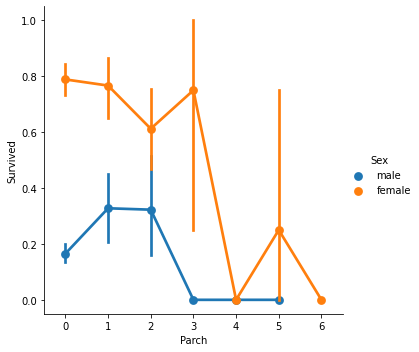

In [27]:
sns.factorplot(x='Parch', y='Survived', hue='Sex', data=df_train)

#Parch는 남자는 2 vs 2+로 그룹화 , 여자는 3 vs 3+그룹화 하자.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


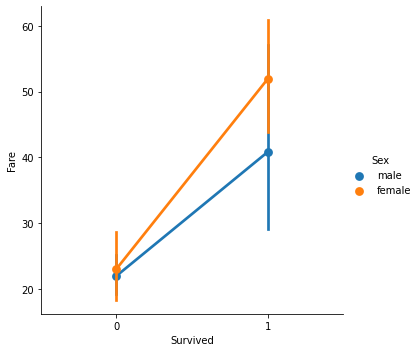

In [28]:
#Fare and Survived
low_fare = df_train[df_train['Fare']<80]
died = low_fare[low_fare['Survived'] == 0]
survived = low_fare[low_fare['Survived'] == 1]

sns.factorplot(x='Survived', y='Fare', hue='Sex', data=df_train)


# 운임이 낮은 class를 탑승한 승객들이 많이 죽었다. 물론 절대수가 많은 이유도 있겠지만. 

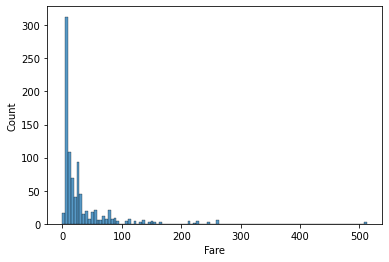

In [29]:
sns.histplot(df_train['Fare'])

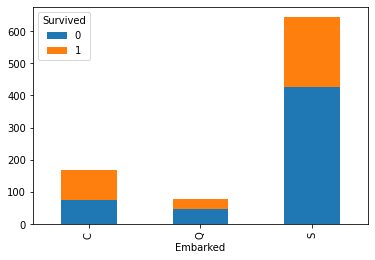

In [30]:
#embark vs survival

# df_train.groupby(['Embarked','Survived']).count()
pd.crosstab(df_train['Embarked'], df_train['Survived']).plot(kind='bar', stacked=True)

# 결측치가 없으면 그대로 쓰면 되겠다. 

# Feature Engineering
1. Outliner 제거 :  Fare등(done)
2. 결측지 핸들링 (done)
- Age 결측치 : 177명이나 비는데.. 이건 pclass를 뽑고, 각 class별 나이 평균을 넣어주자. 
3. 인코딩 : Sex, Age group화
4. 데이터 ㅁ
3. Things to do
인코딩 : Sex,이제까지 정리
4. 여성의 생존률이 더 높다. -> 인코딩 필요
5. Class 별로 생존률이 다르다. 1등석이 가장 높다 -> 활용 ㅇㅋ
6. 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩)
7. Parch는 
해야할 것:
8. sib / children 분석
: 아마 female with mean of children whose parents are survived -> feature engineering
: 
: fare에서 outliner 제거해줘야함
: Parch는 남자는 2 vs 2+로 그룹화 , 여자는 3 vs 3+그룹화 하자.
: Embarked # 결측치가 없으면 그대로 쓰면 되겠다. (done)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


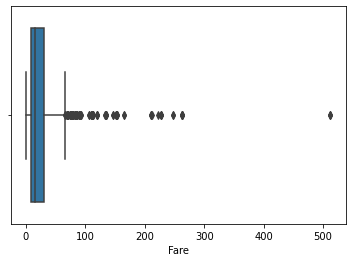

In [31]:
from pandas.core.algorithms import quantile
#Outlier detection
sns.boxplot(df_train['Fare'],data=df_train)






In [32]:
# Outlier 제거
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_train['Fare']=np.where(df_train['Fare']>upper_whisker,upper_whisker,np.where(df_train['Fare']<lower_whisker,lower_whisker,df_train['Fare']))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


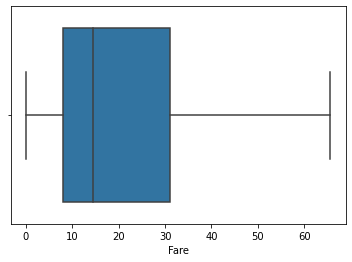

In [33]:
sns.boxplot(df_train['Fare'], data=df_train)

In [34]:
df_train['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [35]:
#결측치 핸들링. AGE..
#1. Cabin : 날리기
#2. Age : Class별 평균나이로 집어 넣기
#3. Embarked : 걍 알아서 아무거나 넣기

df_train.drop(columns=['Cabin'], inplace=True)


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [37]:
#Pclass별 성별 나이 평균을 구하고 이를 결측값이 자동으로 집어넣는 함수.

df_train['Age']=df_train.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [38]:
df_train['Age'].value_counts()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [39]:
#Embark 결측값은 가장 많이 나온것 넣어보자
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


# Feature Engineering
2. 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩) (done)
3. Parch는 그룹화 한 나이에 M+F 붙여서 Sex_Parch0 1 2 3 4 5 6 7 8같이 컬럼을 신규로 만들고 Sex, Parch Drop 하자.   혹은 family size를 구하자. Parch+Sibling이 FAMILY SIZE이니. (done-> family size로)
해야할 것:

# Modeling
1. 인코딩 : Sex, Age group화

In [43]:
df_train['Age'] = df_train['Age'].astype(int)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 101.9+ KB


In [45]:
df_train['Age'].value_counts()

26    112
21     66
30     36
24     31
28     29
     ... 
12      1
53      1
80      1
66      1
74      1
Name: Age, Length: 71, dtype: int64

In [46]:
df_train[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     891 non-null    int64
dtypes: int64(1)
memory usage: 46.2 KB


In [47]:
df_train.loc[df_train['Age'] <=11,'Age'] = 0
df_train.loc[(df_train['Age'] > 11) & (df_train['Age'] <= 18), 'Age'] = 1
df_train.loc[(df_train['Age'] > 18) & (df_train['Age'] <= 22), 'Age'] = 2
df_train.loc[(df_train['Age'] > 22) & (df_train['Age'] <= 27), 'Age'] = 3
df_train.loc[(df_train['Age'] > 27) & (df_train['Age'] <= 33), 'Age'] = 4
df_train.loc[(df_train['Age'] > 33) & (df_train['Age'] <= 40), 'Age'] = 5
df_train.loc[(df_train['Age'] > 40) & (df_train['Age'] <= 66), 'Age'] = 6
df_train.loc[ df_train['Age'] > 66, 'Age'] = 6

df_train['Age'].value_counts()


3    200
6    169
4    137
2    134
5    112
1     71
0     68
Name: Age, dtype: int64

In [48]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,2,1,0,A/5 21171,7.2500,S
2,1,1,female,5,1,0,PC 17599,65.6344,C
3,1,3,female,3,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,5,1,0,113803,53.1000,S
5,0,3,male,5,0,0,373450,8.0500,S


In [49]:
#Family size 만들기

df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,,
1,0,3,male,2,1,0,A/5 21171,7.2500,S,1
2,1,1,female,5,1,0,PC 17599,65.6344,C,1
3,1,3,female,3,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,female,5,1,0,113803,53.1000,S,1
5,0,3,male,5,0,0,373450,8.0500,S,0


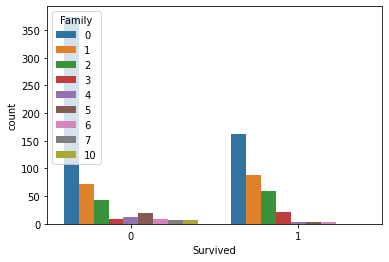

In [50]:
sns.countplot(x='Survived', data=df_train, hue='Family')

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 108.9+ KB


#할거 
1.sex, embarked 인코딩
2. sibsp, parch, ticket, fare drop시키기
3. test, train data 와꾸 일치시키기
4. 모델링

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB


In [53]:
#Sex 인코딩

df_train['Sex'].replace({'male': 1, 'female':0}, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,,
1,0,3,1,2,1,0,A/5 21171,7.2500,S,1
2,1,1,0,5,1,0,PC 17599,65.6344,C,1
3,1,3,0,3,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,0,5,1,0,113803,53.1000,S,1
5,0,3,1,5,0,0,373450,8.0500,S,0


In [54]:
#Embarked 인코딩
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 108.9+ KB


In [55]:
df_train['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)

In [56]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,,
1,0,3,1,2,1,0,A/5 21171,7.2500,1,1
2,1,1,0,5,1,0,PC 17599,65.6344,2,1
3,1,3,0,3,0,0,STON/O2. 3101282,7.9250,1,0
4,1,1,0,5,1,0,113803,53.1000,1,1
5,0,3,1,5,0,0,373450,8.0500,1,0


In [57]:
#drop ticket

df_train.drop(columns='Ticket', inplace=True)

In [58]:
#passenger id drop
df_train.reset_index(drop=True, inplace=True)


In [59]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,2,1,0,7.2500,1,1
1,1,1,0,5,1,0,65.6344,2,1
2,1,3,0,3,0,0,7.9250,1,0
3,1,1,0,5,1,0,53.1000,1,1
4,0,3,1,5,0,0,8.0500,1,0


# **Test 데이터도 똑같이 맞추자. train이랑**

#굵은 텍스트 그 다음에 Modeling 들어가자.